In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
from scipy import stats
#import cf_units as cf
# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs'

In [3]:
filedir_ssp = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SSP245'
filedir_sai = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SAI'

clm_ssp = xr.open_dataset(filedir_ssp + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2016-2069.nc')
clm_sai = xr.open_dataset(filedir_sai + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2036-2069.nc')

conarea_clm_ssp = clm_ssp['area'].sel(crops=0)
conarea_clm_ssp = conarea_clm_ssp * 100

cornyield_clm_ssp = clm_ssp['yield'].sel(crops=0)
cornyield_clm_sai = clm_sai['yield'].sel(crops=0)

In [4]:
timessp = conarea_clm_ssp['time'].values
lat = conarea_clm_ssp['lat'].values
lon = conarea_clm_ssp['lon'].values

filedir_area = '/glade/derecho/scratch/brendanc/archive/240509.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase1.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_2036-2045/lnd/hist'
area = xr.open_dataset(filedir_area + '/240509.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase1.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_2036-2045.clm2.h2.2036-01-01-00000.nc')
area = area.area
area = area * 100
filedir_maizefrac = '/glade/campaign/univ/urtg0006/Brendan/GGCMIinput_2015soc_0.5deg_5.2/landuse'
maizefrac = xr.open_dataset(filedir_maizefrac + '/landuse-15crops_2015soc_annual_2015_2100.shifted.nc',decode_times=False)
maizefrac_rain = maizefrac.maize_rainfed
maizefrac_irr = maizefrac.maize_irrigated
maizefrac = maizefrac_rain + maizefrac_irr
maizefrac = maizefrac.isel(lat=slice(None, None, -1))
maizefrac_2016_2069 = maizefrac.sel(time=slice(355.0, 408.0))
maizefrac_2016_2068 = maizefrac.sel(time=slice(355.0, 407.0))

maizefrac = maizefrac_2016_2069.values
maizefrac_newtime = xr.DataArray(maizefrac, coords={'time': timessp,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

maize_area_tot_ssp = (maizefrac_newtime) * (area)
maize_area_tot_ssp = maize_area_tot_ssp.where(maize_area_tot_ssp > 10)
maize_area_tot_sai = maize_area_tot_ssp.sel(time=slice('2036','2069'))

In [5]:
time_ssp_lpj = np.arange(np.datetime64('2015-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))
time_sai_lpj = np.arange(np.datetime64('2035-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))

In [6]:
maizefrac_2015 = maizefrac_2016_2069.values
maizefrac_newtime_2015 = xr.DataArray(maizefrac_2015, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

maize_area_tot_2015_ssp = (maizefrac_newtime_2015) * (area)
maize_area_tot_2015_ssp = maize_area_tot_2015_ssp.where(maize_area_tot_2015_ssp > 10)
maize_area_tot_2015_sai = maize_area_tot_2015_ssp.sel(time=slice('2035','2068'))

In [7]:
maize_area_plot = maize_area_tot_sai.sel(time='2036')

In [8]:
cornyield_clm_ssp = cornyield_clm_ssp.where(maize_area_tot_ssp > 10)
cornyield_clm_sai = cornyield_clm_sai.where(maize_area_tot_sai > 10)

In [9]:
time_ssp_lpj = np.arange(np.datetime64('2015-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))
time_sai_lpj = np.arange(np.datetime64('2035-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))

In [10]:
filedir3 = '/glade/p/univ/urtg0006/Brendan/GGCMI-output/lpj-guess/updated'
cornlpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_yield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_yield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_irr = cornlpjssp_irr['yield-mai-firr']
cornlpjssp_irr = cornlpjssp_irr.isel(lat=slice(None, None, -1))
cornlpjarise_irr = cornlpjarise_irr['yield-mai-firr']
cornlpjarise_irr = cornlpjarise_irr.isel(lat=slice(None, None, -1))

cornlpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_yield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_yield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_noirr = cornlpjssp_noirr['yield-mai-noirr']
cornlpjssp_noirr = cornlpjssp_noirr.isel(lat=slice(None, None, -1))
cornlpjarise_noirr = cornlpjarise_noirr['yield-mai-noirr']
cornlpjarise_noirr = cornlpjarise_noirr.isel(lat=slice(None, None, -1))

timesai = maize_area_tot_2015_sai['time'].values
timessp = maize_area_tot_2015_ssp['time'].values

cornyieldpljsai = cornlpjarise_noirr + cornlpjarise_irr
cornyieldlpjssp = cornlpjssp_irr + cornlpjssp_noirr
LPJSAI = cornyieldpljsai.values
cornyield_lpj_sai = xr.DataArray(LPJSAI, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

LPJSSP = cornyieldlpjssp.values
cornyield_lpj_ssp = xr.DataArray(LPJSSP, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

cornyield_lpj_ssp = cornyield_lpj_ssp.where(maize_area_tot_2015_ssp > 10)
cornyield_lpj_sai = cornyield_lpj_sai.where(maize_area_tot_2015_sai > 10)

#timessp = cornyield_clm_ssp['time'].values
lat = cornyield_clm_ssp['lat'].values
lon = cornyield_clm_ssp['lon'].values
LPJSSPYIELDnoirr = cornlpjssp_noirr.values
cornlpjssp_noirr = xr.DataArray(LPJSSPYIELDnoirr, coords={'time': timessp,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
#timesai = cornyield_clm_sai['time'].values
LPJSAIYIELDnoirr = cornlpjarise_noirr.values
cornlpjarise_noirr = xr.DataArray(LPJSAIYIELDnoirr, coords={'time': timesai,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

LPJSSPYIELDirr = cornlpjssp_irr.values
cornlpjssp_irr = xr.DataArray(LPJSSPYIELDirr, coords={'time': timessp,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
timesai = cornyield_clm_sai['time'].values
LPJSAIYIELDirr = cornlpjarise_irr.values
cornlpjarise_irr = xr.DataArray(LPJSAIYIELDirr, coords={'time': timesai,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

In [11]:
cornlpjssp_noirr = cornlpjssp_noirr.where(maize_area_tot_2015_ssp > 10)
cornlpjssp_irr = cornlpjssp_irr.where(maize_area_tot_2015_ssp > 10)

cornlpjarise_noirr = cornlpjarise_noirr.where(maize_area_tot_2015_sai > 10)
cornlpjarise_irr = cornlpjarise_irr.where(maize_area_tot_2015_sai > 10)

cornlpjssp_noirr_slice = cornlpjssp_noirr.sel(time=slice('2050-01-01', '2069-01-01'))
cornlpjssp_noirr_slice_avg = cornlpjssp_noirr_slice.mean(dim='time')
cornlpjarise_noirr_slice = cornlpjarise_noirr.sel(time=slice('2050-01-01', '2069-01-01'))
cornlpjarise_noirr_slice_avg = cornlpjarise_noirr_slice.mean(dim='time')
lpjdifnoirr = cornlpjarise_noirr_slice_avg - cornlpjssp_noirr_slice_avg

cornlpjssp_irr_slice = cornlpjssp_irr.sel(time=slice('2050-01-01', '2069-01-01'))
cornlpjssp_irr_slice_avg = cornlpjssp_irr_slice.mean(dim='time')
cornlpjarise_irr_slice = cornlpjarise_irr.sel(time=slice('2050-01-01', '2069-01-01'))
cornlpjarise_irr_slice_avg = cornlpjarise_irr_slice.mean(dim='time')
lpjdifirr = cornlpjarise_irr_slice_avg - cornlpjssp_irr_slice_avg


stat, pval = scipy.stats.ttest_ind(cornlpjssp_noirr_slice, cornlpjarise_noirr_slice)
pval_lpj_noirr = xr.DataArray(data=pval, 
                     dims=['lat', 'lon'], 
                     coords=dict(lon=(['lon'], cornlpjarise_noirr_slice_avg.lon.values), 
                                 lat=(['lat'], cornlpjarise_noirr_slice_avg.lat.values)))

stat, pval = scipy.stats.ttest_ind(cornlpjssp_irr_slice, cornlpjarise_irr_slice)
pval_lpj_irr = xr.DataArray(data=pval, 
                     dims=['lat', 'lon'], 
                     coords=dict(lon=(['lon'], cornlpjarise_irr_slice_avg.lon.values), 
                                 lat=(['lat'], cornlpjarise_irr_slice_avg.lat.values)))

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [12]:
filedir4 = '/glade/p/univ/urtg0006/Brendan/GGCMI-output/pdssat'

cornpdssatarise_sdif_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_yield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatarise_sdif_irr = cornpdssatarise_sdif_irr['yield-mai-firr']
cornpdssatarise_sdif_irr = cornpdssatarise_sdif_irr.isel(lat=slice(None, None, -1))
cornpdssatarise_sdif_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_yield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatarise_sdif_noirr = cornpdssatarise_sdif_noirr['yield-mai-noirr']
cornpdssatarise_sdif_noirr = cornpdssatarise_sdif_noirr.isel(lat=slice(None, None, -1))

cornpdssatssp_sdif_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_yield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatssp_sdif_irr = cornpdssatssp_sdif_irr['yield-mai-firr']
cornpdssatssp_sdif_irr = cornpdssatssp_sdif_irr.isel(lat=slice(None, None, -1))
cornpdssatssp_sdif_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_yield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatssp_sdif_noirr = cornpdssatssp_sdif_noirr['yield-mai-noirr']
cornpdssatssp_sdif_noirr = cornpdssatssp_sdif_noirr.isel(lat=slice(None, None, -1))


cornyieldpdssatsai_sdif = cornpdssatarise_sdif_irr + cornpdssatarise_sdif_noirr
cornyieldpdssatssp_sdif = cornpdssatssp_sdif_irr + cornpdssatssp_sdif_noirr

PDSSATSAISDIFYIELD = cornyieldpdssatsai_sdif.values
cornyield_pdssat_sai_sdif = xr.DataArray(PDSSATSAISDIFYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

PDSSATSSPSDIFYIELD = cornyieldpdssatssp_sdif.values
cornyield_pdssat_ssp_sdif = xr.DataArray(PDSSATSSPSDIFYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

In [13]:
cornyield_pdssat_ssp_sdif = cornyield_pdssat_ssp_sdif.where(maize_area_tot_2015_ssp > 10)
cornyield_pdssat_sai_sdif = cornyield_pdssat_sai_sdif.where(maize_area_tot_2015_sai > 10)

In [14]:
cornyield_clm_ssp = (cornyield_clm_ssp * maize_area_tot_ssp)
cornyield_clm_sai  = (cornyield_clm_sai * maize_area_tot_sai)

cornyield_clm_ssp_slice_2050 = cornyield_clm_ssp.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_clm_ssp_slice_avg_2050 = cornyield_clm_ssp_slice_2050.mean(dim='time')
cornyield_clm_sai_slice_2050 = cornyield_clm_sai.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_clm_sai_slice_avg_2050 = cornyield_clm_sai_slice_2050.mean(dim='time')
clmdif_2050 = (cornyield_clm_sai_slice_avg_2050 - cornyield_clm_ssp_slice_avg_2050) / (cornyield_clm_ssp_slice_avg_2050)
clmdif_2050 = (clmdif_2050) * (100)

cornyield_lpj_ssp = (cornyield_lpj_ssp * maize_area_tot_2015_ssp)
cornyield_lpj_sai = (cornyield_lpj_sai * maize_area_tot_2015_sai)

cornyield_lpj_sai_slice_2050 = cornyield_lpj_sai.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_lpj_sai_slice_avg_2050 = cornyield_lpj_sai_slice_2050.mean(dim='time')
cornyield_lpj_ssp_slice_2050 = cornyield_lpj_ssp.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_lpj_ssp_slice_avg_2050 = cornyield_lpj_ssp_slice_2050.mean(dim='time')
lpjdif_2050 = (cornyield_lpj_sai_slice_avg_2050 - cornyield_lpj_ssp_slice_avg_2050) / (cornyield_lpj_ssp_slice_avg_2050)
lpjdif_2050 = (lpjdif_2050) * (100)

cornyield_pdssat_ssp_sdif = (cornyield_pdssat_ssp_sdif * maize_area_tot_2015_ssp)
cornyield_pdssat_sai_sdif = (cornyield_pdssat_sai_sdif * maize_area_tot_2015_sai)

cornyield_pdssat_sai_sdif_slice_2050 = cornyield_pdssat_sai_sdif.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_pdssat_sai_sdif_slice_avg_2050 = cornyield_pdssat_sai_sdif_slice_2050.mean(dim='time')
cornyield_pdssat_ssp_sdif_slice_2050 = cornyield_pdssat_ssp_sdif.sel(time=slice('2049-01-01', '2068-01-01'))
cornyield_pdssat_ssp_sdif_slice_avg_2050 = cornyield_pdssat_ssp_sdif_slice_2050.mean(dim='time')
dssatdif_2050 = (cornyield_pdssat_sai_sdif_slice_avg_2050 - cornyield_pdssat_ssp_sdif_slice_avg_2050) / (cornyield_pdssat_ssp_sdif_slice_avg_2050)
dssatdif_2050 = (dssatdif_2050) * (100)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [15]:
cornyield_clm_ref_slice = cornyield_clm_ssp.sel(time=slice('2016-01-01', '2025-01-01'))
cornyield_clm_ref_slice_avg = cornyield_clm_ref_slice.mean(dim='time')
clmdifref = (cornyield_clm_ssp_slice_avg_2050 - cornyield_clm_ref_slice_avg) / (cornyield_clm_ref_slice_avg)
clmdifref = (clmdifref) * (100)

cornyield_lpj_ref_slice = cornyield_lpj_ssp.sel(time=slice('2016-01-01', '2025-01-01'))
cornyield_lpj_ref_slice_avg = cornyield_lpj_ref_slice.mean(dim='time')
lpjdifref = (cornyield_lpj_ssp_slice_avg_2050 - cornyield_lpj_ref_slice_avg) / (cornyield_lpj_ref_slice_avg)
lpjdifref = (lpjdifref) * (100)

cornyield_dsat_ref_slice = cornyield_pdssat_ssp_sdif.sel(time=slice('2016-01-01', '2025-01-01'))
cornyield_dsat_ref_slice_avg = cornyield_dsat_ref_slice.mean(dim='time')
dsatdifref = (cornyield_pdssat_ssp_sdif_slice_avg_2050 - cornyield_dsat_ref_slice_avg) / (cornyield_dsat_ref_slice_avg)
dsatdifref = (dsatdifref) * (100)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [21]:
cornyield_clm_ssp_slice_avg_2050

<xarray.DataArray (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    crops    float64 0.0
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
Attributes:
    units:    tonN/ha/yr

In [22]:
cornyield_clm_ref_slice_avg

<xarray.DataArray (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    crops    float64 0.0
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
Attributes:
    units:    tonN/ha/yr

In [26]:
stat, pval = scipy.stats.ttest_ind(cornyield_clm_sai_slice_2050, cornyield_clm_ssp_slice_2050)
pval_clm_2050 = xr.DataArray(data=pval, 
                     dims=['lat', 'lon'], 
                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))

stat, pval = scipy.stats.ttest_ind(cornyield_lpj_sai_slice_2050, cornyield_lpj_ssp_slice_2050)
pval_lpj_2050 = xr.DataArray(data=pval, 
                     dims=['lat', 'lon'], 
                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))

stat, pval = scipy.stats.ttest_ind(cornyield_pdssat_sai_sdif_slice_2050, cornyield_pdssat_ssp_sdif_slice_2050)
pval_pdssat_2050 = xr.DataArray(data=pval, 
                     dims=['lat', 'lon'], 
                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))
###################################
#stat, pval = scipy.stats.ttest_ind(cornyield_clm_ssp_slice_avg_2050, cornyield_clm_ref_slice_avg)
#pval_clm_ref = xr.DataArray(data=pval, 
#                     dims=['lat', 'lon'], 
#                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
#                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))
#
#stat, pval = scipy.stats.ttest_ind(cornyield_lpj_ssp_slice_avg_2050, cornyield_lpj_ref_slice_avg)
#pval_lpj_ref = xr.DataArray(data=pval, 
#                     dims=['lat', 'lon'], 
#                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
#                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))

#stat, pval = scipy.stats.ttest_ind(cornyield_pdssat_ssp_sdif_slice_avg_2050, cornyield_dsat_ref_slice_avg)
#pval_pdssat_ref = xr.DataArray(data=pval, 
#                     dims=['lat', 'lon'], 
#                     coords=dict(lon=(['lon'], cornyield_clm_sai_slice_avg_2050.lon.values), 
#                                 lat=(['lat'], cornyield_clm_sai_slice_avg_2050.lat.values)))

In [27]:
#fut_levels = np.arange(-0.8, 1.0, 0.2)
#fut_colors = ['#d7301f',
#              '#ef6548',
#              '#fc8d59',
#              '#fdbb84',
#              '#f7f7f7',
#              '#f7f7f7',
#              '#9ecae1',
#              '#6baed6',
#              '#4292c6',
#              '#2171b5',]

fut_levels = np.arange(-40, 50, 10)
fut_colors = ['#8c510a',
              '#bf812d',
              '#dfc27d',
              '#f6e8c3',
              '#f7f7f7',
              '#f7f7f7',
              '#c7eae5',
              '#80cdc1',
              '#35978f',
              '#01665e']

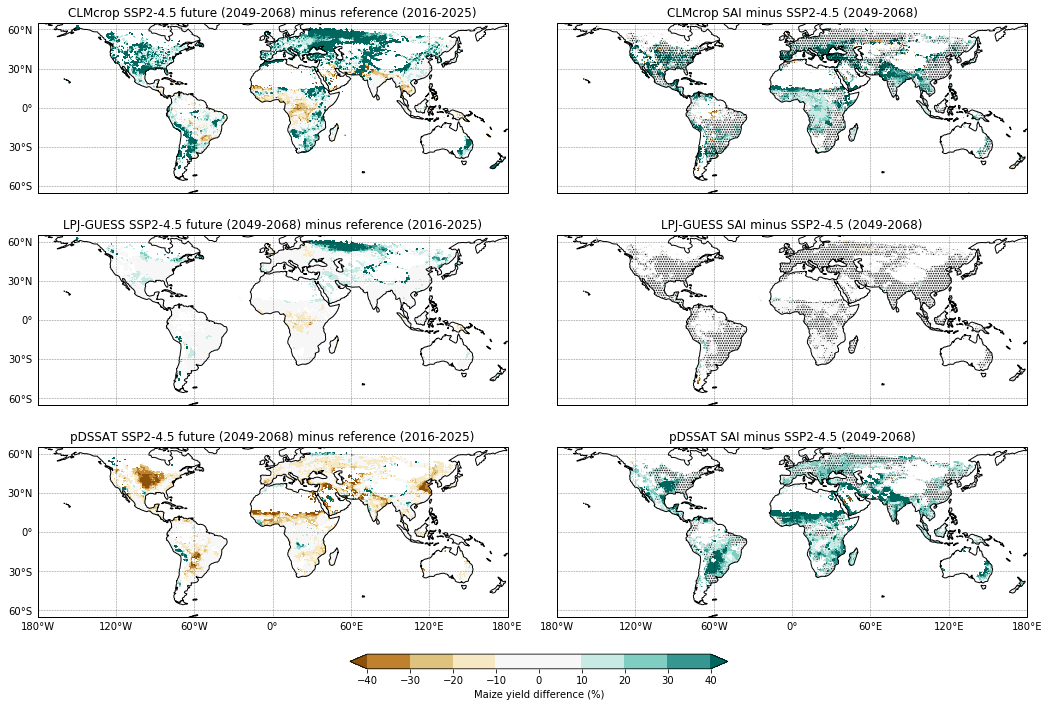

In [38]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(3,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(3,2,2,projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(3,2,3,projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(3,2,4,projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(3,2,5,projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(3,2,6,projection=ccrs.PlateCarree())

cb1 = clmdifref.plot.contourf(ax=ax1, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax1.coastlines()
ax1.set_xlim(-180, 180)
ax1.set_ylim(-65, 65)
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl1.xlabels_top = False
gl1.xlabels_bottom = False
gl1.ylabels_left = True
gl1.ylabels_right=False
gl1.xlines = True
#gl1.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'color': 'black'}
gl1.ylabel_style = {'color': 'black'}
#ax1.contourf(pval_clm_ref.lon.values, pval_clm_ref.lat.values, pval_clm_ref.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
#pval_clm_2050.where(pval_clm_2050>0.05).plot.contourf(transform=ccrs.PlateCarree(), colors='none', levels=[0,1], hatches=['...'], add_colorbar=False)
ax1.title.set_text('CLMcrop SSP2-4.5 future (2049-2068) minus reference (2016-2025)')


clmdif_2050.plot.contourf(ax=ax2, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax2.coastlines()
ax2.set_xlim(-180, 180)
ax2.set_ylim(-65, 65)
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl2.xlabels_top = False
gl2.xlabels_bottom = False
gl2.ylabels_right=False
gl2.ylabels_left = False
gl2.xlines = True
#gl2.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl2.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'color': 'black'}
gl2.ylabel_style = {'color': 'black'}
ax2.contourf(pval_clm_2050.lon.values, pval_clm_2050.lat.values, pval_clm_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax2.title.set_text('CLMcrop SAI minus SSP2-4.5 (2049-2068)')

lpjdifref.plot.contourf(ax=ax3, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax3.coastlines()
ax3.set_xlim(-180, 180)
ax3.set_ylim(-65, 65)
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl3.xlabels_top = False
gl3.ylabels_left = True
gl3.xlabels_bottom = False
gl3.ylabels_right=False
gl3.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl3.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.xlabel_style = {'color': 'black'}
gl3.ylabel_style = {'color': 'black'}
#ax3.contourf(pval_lpj_ref.lon.values, pval_lpj_ref.lat.values, pval_lpj_ref.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax3.title.set_text('LPJ-GUESS SSP2-4.5 future (2049-2068) minus reference (2016-2025)')

lpjdif_2050.plot.contourf(ax=ax4, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax4.coastlines()
ax4.set_xlim(-180, 180)
ax4.set_ylim(-65, 65)
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl4.xlabels_top = False
gl4.xlabels_bottom = False
gl4.ylabels_right=False
gl4.ylabels_left = False
gl4.xlines = True
#gl1.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl4.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.xlabel_style = {'color': 'black'}
gl4.ylabel_style = {'color': 'black'}
ax4.contourf(pval_lpj_2050.lon.values, pval_lpj_2050.lat.values, pval_lpj_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
#pval_clm_2050.where(pval_clm_2050>0.05).plot.contourf(transform=ccrs.PlateCarree(), colors='none', levels=[0,1], hatches=['...'], add_colorbar=False)
ax4.title.set_text('LPJ-GUESS SAI minus SSP2-4.5 (2049-2068)')


dsatdifref.plot.contourf(ax=ax5, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax5.coastlines()
ax5.set_xlim(-180, 180)
ax5.set_ylim(-65, 65)
gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl5.xlabels_top = False
gl5.ylabels_left = True
gl5.ylabels_right=False
gl5.xlines = True
#gl2.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl5.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl5.xformatter = LONGITUDE_FORMATTER
gl5.yformatter = LATITUDE_FORMATTER
gl5.xlabel_style = {'color': 'black'}
gl5.ylabel_style = {'color': 'black'}
#ax5.contourf(pval_pdssat_ref.lon.values, pval_pdssat_ref.lat.values, pval_pdssat_ref.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax5.title.set_text('pDSSAT SSP2-4.5 future (2049-2068) minus reference (2016-2025)')

dssatdif_2050.plot.contourf(ax=ax6, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax6.coastlines()
ax6.set_xlim(-180, 180)
ax6.set_ylim(-65, 65)
gl6 = ax6.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl6.xlabels_top = False
gl6.ylabels_right=False
gl6.ylabels_left = False
gl6.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl6.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl6.xformatter = LONGITUDE_FORMATTER
gl6.yformatter = LATITUDE_FORMATTER
gl6.xlabel_style = {'color': 'black'}
gl6.ylabel_style = {'color': 'black'}
ax6.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax6.title.set_text('pDSSAT SAI minus SSP2-4.5 (2049-2068)')

plt.tight_layout()
fig.subplots_adjust(bottom=0.3)
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([0.34, 0.24, 0.35, 0.017])
fig.colorbar(cb1, cax=cbar_ax, orientation='horizontal', label="Maize yield difference (%)")
plt.subplots_adjust(hspace=0.25,wspace=0.0)
#fig.suptitle('SSP2-4.5-SAI-1.5C minus SSP2-4.5', size=12, y=0.99999999999)
plt.savefig(savedir+'/Fig3_JJ.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )

In [84]:
maize_area_plot = maize_area_plot.squeeze()
maize_area_plot

<xarray.DataArray (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2036-01-01
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75

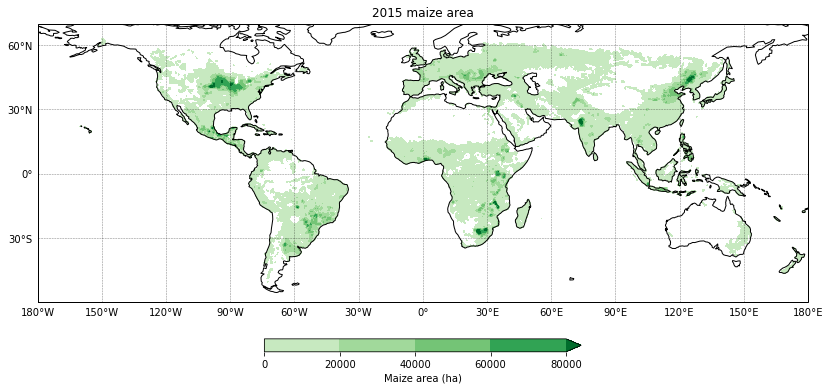

In [85]:
fut_levels = np.arange(0, 1e5, 0.2e5)
fut_colors = ['#c7e9c0','#a1d99b','#74c476','#31a354','#006d2c']

fig = plt.figure(figsize=(11,6))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
#ax3 = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
cb1 = maize_area_plot.plot.contourf(ax=ax1, colors=fut_colors, levels=fut_levels, add_colorbar=False)
ax1.coastlines()
ax1.set_xlim(-180, 180)
ax1.set_ylim(-60, 70)
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl1.xlabels_top = False
gl1.xlabels_bottom = True
gl1.ylabels_left = True
gl1.ylabels_right=False
gl1.xlines = True
gl1.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'color': 'black'}
gl1.ylabel_style = {'color': 'black'}
#ax1.contourf(cprob_xa.lon.values, cprob_xa.lat.values, cprob_xa.values,
#             levels=[0.05, 1.0], colors='none', hatches=['///'],
#             transform=ccrs.PlateCarree())
ax1.title.set_text('')

plt.tight_layout()
fig.subplots_adjust(bottom=0.3)
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.03])
fig.colorbar(cb1, cax=cbar_ax, orientation='horizontal', label="Maize area (ha)")
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.suptitle('2015 maize area', size=12, y=0.9999999)
plt.savefig(savedir+'/maize_area.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )